In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, ParameterGrid
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pickle
# imports KFold from sklearn.model_selection
from sklearn.model_selection import KFold
# imports ColumnTransformer from sklearn.compose
from sklearn.compose import ColumnTransformer
# imports Pipeline from sklearn.pipeline
from sklearn.pipeline import Pipeline
# imports StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

file = open('../data/data_prep.save', 'rb')
other_sets, test_sets = pickle.load(file)
file.close()

file = open('../data/data_prep_wo.save', 'rb')
other_sets_wo, test_sets_wo = pickle.load(file)
file.close()

In [2]:
# imports matplotlib package
import matplotlib
# imports pylab from matplotlib
from matplotlib import pylab as plt

# converts data in the excel file into pandas dataframe
df = pd.read_csv(r'/Users/jamesro/Documents/DATA1030-Fall2021/Data-1030-Project/Data/student-mat.csv',sep=';')
# converts G3 into binary scale
pass_final = df.G3 >= 10
fail_final = df.G3 < 10
df.loc[pass_final,'G3'] = 1
df.loc[fail_final,'G3'] = 0
# converts G1 into binary scale
pass_first = df.G1 >= 10
fail_first = df.G1 < 10
df.loc[pass_first,'G1'] = 1
df.loc[fail_first,'G1'] = 0
# converts G2 into binary scale
pass_sec = df.G2 >= 10
fail_sec = df.G2 < 10
df.loc[pass_sec,'G2'] = 1
df.loc[fail_sec,'G2'] = 0
# prints dataframe
print(df)

y = df['G3']
X = df.loc[:, df.columns != 'G3']

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

In [3]:
# defines random_state as 42
random_state = 42
# defines X as all feature columns
X = df.loc[:, df.columns != 'G3']
# defines y as the target variable G3
y = df['G3']

# first split to separate out the test set
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)

# do KFold split on other
kf = KFold(n_splits=5,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print(X_train.head())
    print(X_val.head())
    print(X_test.head())
    onehot_ftrs = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
    minmax_ftrs = ['age','absences']
    std_ftrs = ['Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','G1','G2']

    # collects all the encoders
    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
            ('minmax', MinMaxScaler(), minmax_ftrs),
            ('std', StandardScaler(), std_ftrs)
            ])

    clf = Pipeline(steps=[('preprocessor', preprocessor)])

    # transforms X_train into X_train_prep
    X_train_prep = clf.fit_transform(X_train)
    # transforms X_val into X_val_prep
    X_val_prep = clf.transform(X_val)
    # transforms X_test into X_test_prep
    X_test_prep = clf.transform(X_test)

    # prints X_train_prep
    print(X_train_prep)
    # prints X_val_prep
    print(X_val_prep)
        # prints X_test_prep
    print(X_test_prep)
    print(X_train_prep.shape)
    print(X_val_prep.shape)
    print(X_test_prep.shape)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
181     GP   M   16       U     GT3       T     3     3  services     other   
194     GP   M   16       U     GT3       T     2     3     other     other   
173     GP   F   16       U     GT3       T     1     3   at_home  services   
253     GP   M   16       R     GT3       T     2     1     other     other   
331     GP   F   17       R     GT3       T     2     4   at_home     other   

     ... romantic famrel  freetime  goout  Dalc Walc health absences G1 G2  
181  ...      yes      4         2      3     1    2      3        2  1  1  
194  ...       no      5         3      3     1    1      3        0  1  1  
173  ...      yes      4         3      5     1    1      3        0  0  0  
253  ...       no      3         3      2     1    3      3        0  0  0  
331  ...      yes      4         4      3     1    1      5        7  1  1  

[5 rows x 32 columns]
    school sex  age address famsize Psta

[5 rows x 32 columns]
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
78      GP   M   17       U     GT3       T     2     1     other     other   
371     MS   M   18       R     LE3       T     1     2   at_home  services   
248     GP   M   18       R     LE3       T     3     3     other  services   
55      GP   F   16       U     GT3       A     2     1     other     other   
390     MS   M   20       U     LE3       A     2     2  services  services   

     ... romantic famrel  freetime  goout  Dalc Walc health absences G1 G2  
78   ...       no      4         5      1     1    1      3        2  0  0  
371  ...      yes      4         3      3     2    3      3        3  1  1  
248  ...      yes      4         3      3     1    3      5        8  0  0  
55   ...      yes      5         3      4     1    1      2        8  0  0  
390  ...       no      5         5      4     4    5      4       11  0  0  

[5 rows x 32 columns]
[[ 1.          0. 

In [4]:
onehot_ftrs = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
minmax_ftrs = ['age','absences']
std_ftrs = ['Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','G1','G2']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)
        ])

def MLpipe_KFold_Accu(preprocessor, ML_algo, param_grid):
    '''
    This function splits the data to other/test (80/20) and then applies KFold with 4 folds to other.
    The RMSE is minimized in cross-validation.
    '''
    nr_states = 10
    test_scores = np.zeros(nr_states)
    best_models = []

    for i in range(nr_states):
        
        X_other, y_other = other_sets[i]
        X_test, y_test = test_sets[i]

        kf = KFold(n_splits=5,shuffle=True,random_state=42*i)
         
        pipe = make_pipeline(preprocessor,ML_algo)
        
        grid = GridSearchCV(pipe, param_grid=param_grid, scoring = 'accuracy',
                        cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
        
        grid.fit(X_other, y_other)
        results = pd.DataFrame(grid.cv_results_)
        print('best model parameters:',grid.best_params_)
        
        print('validation score:',grid.best_score_) # this is the mean validation score over all iterations
        # save the model
        best_models.append(grid)
        # calculate RMSE value for test set
        y_test_pred = best_models[-1].predict(X_test)
        test_scores[i] = accuracy_score(y_test,y_test_pred)
        print('test score:',test_scores[i])
        
    return best_models, test_scores, grid, X_test, y_test

In [5]:
print(df.G3.value_counts())


baseline_accuracy = df.G3.value_counts()[1]/len(df)
print("baseline accuracy score: ", baseline_accuracy)

1    265
0    130
Name: G3, dtype: int64
baseline accuracy score:  0.6708860759493671


In [6]:
from sklearn.linear_model import LogisticRegression
import math 

l1_param_grid = {
                 'logisticregression__C': [1e-2, 1e-1, 1e0, 1e1, 1e2],
                 'logisticregression__max_iter': [10e5]
                 } 

L1R = LogisticRegression(penalty='l1', solver='saga')
l1_best_models, l1_test_scores, l1_grid, l1_X_test, l1_y_test = MLpipe_KFold_Accu(preprocessor, L1R, l1_param_grid)

l1_mean = np.mean(l1_test_scores)
l1_std = np.std(l1_test_scores)

print('mean test score: ',l1_mean)
print('std of test score: ',l1_std)
print('95% Confidence Interval: ',(l1_mean - 1.96*(l1_std/math.sqrt(5)), l1_mean + 1.96*(l1_std/math.sqrt(5))))
print('standard deviations from baseline: ',(l1_mean - baseline_accuracy)/l1_std)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
best model parameters: {'logisticregression__C': 0.1, 'logisticregression__max_iter': 1000000.0}
validation score: 0.9177083333333333
test score: 0.9240506329113924
Fitting 5 folds for each of 5 candidates, totalling 25 fits
best model parameters: {'logisticregression__C': 0.1, 'logisticregression__max_iter': 1000000.0}
validation score: 0.9208829365079365
test score: 0.9113924050632911
Fitting 5 folds for each of 5 candidates, totalling 25 fits
best model parameters: {'logisticregression__C': 0.1, 'logisticregression__max_iter': 1000000.0}
validation score: 0.9146825396825395
test score: 0.9367088607594937
Fitting 5 folds for each of 5 candidates, totalling 25 fits
best model parameters: {'logisticregression__C': 1.0, 'logisticregression__max_iter': 1000000.0}
validation score: 0.9146329365079365
test score: 0.9113924050632911
Fitting 5 folds for each of 5 candidates, totalling 25 fits
best model parameters: {'logisticregress

In [7]:
from sklearn.linear_model import LogisticRegression
import math 

l2_param_grid = {
                 'logisticregression__C': [1e-2, 1e-1, 1e0, 1e1, 1e2], 
                 'logisticregression__max_iter': [10e5]
                 } 

L2R = LogisticRegression(penalty='l2', solver='saga')
l2_best_models, l2_test_scores, l2_grid, l2_X_test, l2_y_test = MLpipe_KFold_Accu(preprocessor, L2R, l2_param_grid)

l2_mean = np.mean(l2_test_scores)
l2_std = np.std(l2_test_scores)

print('mean test score: ',l2_mean)
print('std of test score: ',l2_std)
print('95% Confidence Interval: ',(l2_mean - 1.96*(l2_std/math.sqrt(5)), l2_mean + 1.96*(l2_std/math.sqrt(5))))
print('standard deviations from baseline: ',(l2_mean - baseline_accuracy)/l2_std)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
best model parameters: {'logisticregression__C': 0.1, 'logisticregression__max_iter': 1000000.0}
validation score: 0.8955357142857142
test score: 0.9367088607594937
Fitting 5 folds for each of 5 candidates, totalling 25 fits
best model parameters: {'logisticregression__C': 1.0, 'logisticregression__max_iter': 1000000.0}
validation score: 0.9146329365079365
test score: 0.9113924050632911
Fitting 5 folds for each of 5 candidates, totalling 25 fits
best model parameters: {'logisticregression__C': 0.1, 'logisticregression__max_iter': 1000000.0}
validation score: 0.9115079365079364
test score: 0.9113924050632911
Fitting 5 folds for each of 5 candidates, totalling 25 fits
best model parameters: {'logisticregression__C': 0.1, 'logisticregression__max_iter': 1000000.0}
validation score: 0.9082837301587301
test score: 0.9240506329113924
Fitting 5 folds for each of 5 candidates, totalling 25 fits
best model parameters: {'logisticregress

In [8]:
from sklearn.linear_model import LogisticRegression
import math 

en_param_grid = {
                 'logisticregression__C': [1e-2, 1e-1, 1e0, 1e1, 1e2],
                 'logisticregression__l1_ratio': [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99],
                 'logisticregression__max_iter': [10000]
                 } 

EN = LogisticRegression(penalty='elasticnet', solver='saga')
en_best_models, en_test_scores, en_grid, en_X_test, en_y_test = MLpipe_KFold_Accu(preprocessor, EN, en_param_grid)

en_mean = np.mean(en_test_scores)
en_std = np.std(en_test_scores)

print('mean test score: ',en_mean)
print('std of test score: ',en_std)
print('95% Confidence Interval: ',(en_mean - 1.96*(en_std/math.sqrt(35)), en_mean + 1.96*(en_std/math.sqrt(35))))
print('standard deviations from baseline: ',(en_mean - baseline_accuracy)/en_std)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
best model parameters: {'logisticregression__C': 0.1, 'logisticregression__l1_ratio': 0.75, 'logisticregression__max_iter': 10000}
validation score: 0.9177083333333333
test score: 0.9240506329113924
Fitting 5 folds for each of 35 candidates, totalling 175 fits
best model parameters: {'logisticregression__C': 0.1, 'logisticregression__l1_ratio': 0.25, 'logisticregression__max_iter': 10000}
validation score: 0.9209325396825397
test score: 0.9113924050632911
Fitting 5 folds for each of 35 candidates, totalling 175 fits
best model parameters: {'logisticregression__C': 0.1, 'logisticregression__l1_ratio': 0.5, 'logisticregression__max_iter': 10000}
validation score: 0.9146825396825395
test score: 0.9367088607594937
Fitting 5 folds for each of 35 candidates, totalling 175 fits
best model parameters: {'logisticregression__C': 1.0, 'logisticregression__l1_ratio': 0.99, 'logisticregression__max_iter': 10000}
validation score: 0.91463

In [9]:
from sklearn.ensemble import RandomForestClassifier
import math 

rfc_param_grid = {
                   'randomforestclassifier__max_depth': [1, 3, 10, 30, 100],
                   'randomforestclassifier__max_features': [0.5,0.75,1.0] 
                   } 

ML_algo = RandomForestClassifier()
rfc_best_models, rfc_test_scores, rfc_grid, rfc_X_test, rfc_y_test = MLpipe_KFold_Accu(preprocessor, ML_algo, rfc_param_grid)

rfc_mean = np.mean(rfc_test_scores)
rfc_std = np.std(rfc_test_scores)

print('mean test score: ',rfc_mean)
print('std of test score: ',rfc_std)
print('95% Confidence Interval: ',(rfc_mean - 1.96*(rfc_std/math.sqrt(15)), rfc_mean + 1.96*(rfc_std/math.sqrt(15))))
print('standard deviations from baseline: ',(rfc_mean - baseline_accuracy)/rfc_std)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
best model parameters: {'randomforestclassifier__max_depth': 1, 'randomforestclassifier__max_features': 0.75}
validation score: 0.9177083333333333
test score: 0.9240506329113924
Fitting 5 folds for each of 15 candidates, totalling 75 fits
best model parameters: {'randomforestclassifier__max_depth': 30, 'randomforestclassifier__max_features': 0.75}
validation score: 0.9240575396825397
test score: 0.9113924050632911
Fitting 5 folds for each of 15 candidates, totalling 75 fits
best model parameters: {'randomforestclassifier__max_depth': 1, 'randomforestclassifier__max_features': 0.75}
validation score: 0.9146825396825395
test score: 0.9367088607594937
Fitting 5 folds for each of 15 candidates, totalling 75 fits
best model parameters: {'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 0.5}
validation score: 0.91140873015873
test score: 0.9620253164556962
Fitting 5 folds for each of 15 candidates, tot

In [10]:
from sklearn.svm import SVC
import math 

svc_param_grid = {
                 'svc__gamma': [1000000, 1000, 1, 0.001],
                 'svc__C': [1, 10, 30, 100]
                 } 

SVC = SVC()
svc_best_models, svc_test_scores, svc_grid, svc_X_test, svc_y_test = MLpipe_KFold_Accu(preprocessor, SVC, svc_param_grid)

svc_mean = np.mean(svc_test_scores)
svc_std = np.std(svc_test_scores)

print('mean test score: ',svc_mean)
print('std of test score: ',svc_std)
print('95% Confidence Interval: ',(svc_mean - 1.96*(svc_std/math.sqrt(45)), svc_mean + 1.96*(svc_std/math.sqrt(45))))
print('standard deviations from baseline: ',(svc_mean - baseline_accuracy)/svc_std)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
best model parameters: {'svc__C': 10, 'svc__gamma': 0.001}
validation score: 0.9177083333333333
test score: 0.9240506329113924
Fitting 5 folds for each of 16 candidates, totalling 80 fits
best model parameters: {'svc__C': 10, 'svc__gamma': 0.001}
validation score: 0.9208829365079365
test score: 0.9113924050632911
Fitting 5 folds for each of 16 candidates, totalling 80 fits
best model parameters: {'svc__C': 10, 'svc__gamma': 0.001}
validation score: 0.9146825396825395
test score: 0.9367088607594937
Fitting 5 folds for each of 16 candidates, totalling 80 fits
best model parameters: {'svc__C': 10, 'svc__gamma': 0.001}
validation score: 0.9082341269841269
test score: 0.9620253164556962
Fitting 5 folds for each of 16 candidates, totalling 80 fits
best model parameters: {'svc__C': 10, 'svc__gamma': 0.001}
validation score: 0.9271329365079364
test score: 0.8860759493670886
Fitting 5 folds for each of 16 candidates, totalling 80 fits

In [11]:
from sklearn.neighbors import KNeighborsClassifier
import math 

knn_param_grid = {
                   'kneighborsclassifier__n_neighbors': [1, 10, 30, 100], 
                   'kneighborsclassifier__weights': ['uniform', 'distance']
                   } 

KNN = KNeighborsClassifier()
knn_best_models, knn_test_scores, knn_grid, knn_X_test, knn_y_test = MLpipe_KFold_Accu(preprocessor, KNN, knn_param_grid)

knn_mean = np.mean(knn_test_scores)
knn_std = np.std(knn_test_scores)

print('mean test score: ',knn_mean)
print('std of test score: ',knn_std)
print('95% Confidence Interval: ',(knn_mean - 1.96*(knn_std/math.sqrt(8)), knn_mean + 1.96*(knn_std/math.sqrt(8))))
print('standard deviations from baseline: ',(knn_mean - baseline_accuracy)/knn_std)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
best model parameters: {'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__weights': 'uniform'}
validation score: 0.8891865079365079
test score: 0.8607594936708861
Fitting 5 folds for each of 8 candidates, totalling 40 fits
best model parameters: {'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__weights': 'uniform'}
validation score: 0.8862599206349205
test score: 0.8734177215189873
Fitting 5 folds for each of 8 candidates, totalling 40 fits
best model parameters: {'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__weights': 'uniform'}
validation score: 0.8863095238095238
test score: 0.8860759493670886
Fitting 5 folds for each of 8 candidates, totalling 40 fits
best model parameters: {'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__weights': 'uniform'}
validation score: 0.8892857142857142
test score: 0.8860759493670886
Fitting 5 folds for each of 8 candidates, totalling 

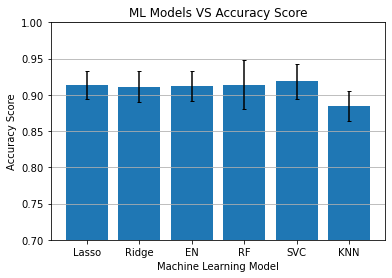

In [12]:
model_name = ["Lasso", "Ridge", "EN", "RF", "SVC", "KNN"]
mean_scores = [l1_mean, l2_mean, en_mean, rfc_mean, svc_mean, knn_mean]
stdev_scores = [l1_std, l2_std, en_std, rfc_std, svc_std, knn_std]

plt.bar(model_name, mean_scores, yerr=stdev_scores, capsize=2)
plt.ylim([0.7,1])
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.xlabel("Machine Learning Model")
plt.ylabel("Accuracy Score")
plt.title("ML Models VS Accuracy Score")
plt.xticks(rotation=0)
plt.savefig('../figures/mlmodels_accu.jpg', dpi=300)
plt.show()

In [13]:
file = open('../Results/l1_models_tuned.save', 'wb')
pickle.dump(l1_best_models, file)
file.close()

file = open('../Results/l2_models_tuned.save', 'wb')
pickle.dump(l2_best_models, file)
file.close()

file = open('../Results/en_models_tuned.save', 'wb')
pickle.dump(l1_best_models, file)
file.close()

file = open('../Results/rfc_models_tuned.save', 'wb')
pickle.dump(rfc_best_models, file)
file.close()

file = open('../Results/svc_models_tuned.save', 'wb')
pickle.dump(svc_best_models, file)
file.close()

file = open('../Results/knn_models_tuned.save', 'wb')
pickle.dump(knn_best_models, file)
file.close()

file = open('../Results/l1_test_scores.save', 'wb')
pickle.dump(l1_test_scores, file)
file.close()

file = open('../Results/l2_test_scores.save', 'wb')
pickle.dump(l2_test_scores, file)
file.close()

file = open('../Results/en_test_scores.save', 'wb')
pickle.dump(en_test_scores, file)
file.close()

file = open('../Results/rfc_test_scores.save', 'wb')
pickle.dump(rfc_test_scores, file)
file.close()

file = open('../Results/svc_test_scores.save', 'wb')
pickle.dump(svc_test_scores, file)
file.close()

file = open('../Results/knn_test_scores.save', 'wb')
pickle.dump(knn_test_scores, file)
file.close()